Para este script vamos a utilizar la colección de datos más claśica en el mundo de la enseñanza del Machine Learning, el Iris Dataset (https://archive.ics.uci.edu/ml/datasets/iris). 

Este dataset contiene datos sobre diferentes flores, concretamente el ancho y el largo de su pétalo y su sépalo. Se dispone a su vez del tipo de flor que es dentro de cuatro categorías posibles. 

# Carga de Datos

Lo primero que vamos a hacer es cargar los datos y almacenarlos en un DataFrame. 
No es necesario disponer de ningún fichero ya que está disponible dentro de la propia API de scikit-learn

In [1]:
# 0. load data
from sklearn.datasets import load_iris
iris = load_iris()
# 0.1 convert data to a Pandas' DataFrame
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
14                 5.8               4.0                1.2               0.2
15                 5.7               4.4                1.5               0.4
16                 5.4               3.9                1.3               0.4
17                 5.1               3.5                1.4               0.3
18                 5.7               3.8                1.7               0.3
19                 5.1               3.8                1.5               0.3
20                 5.4               3.4                1.7               0.2
21                 5.1               3.7                1.5               0.4
22                 4.6               3.6                1.0               0.2
23                 5.1               3.3                1.7               0.5
24                 4.8               3.4                1.9               0.2
25                 5.0               3.0                1.6               0.2
26                 5.0               3.4                1.6               0.4
27                 5.2               3.5                1.5               0.2
28                 5.2               3.4                1.4               0.2
29                 4.7               3.2                1.6               0.2
..                 ...               ...                ...               ...
120                6.9               3.2                5.7               2.3
121                5.6               2.8                4.9               2.0
122                7.7               2.8                6.7               2.0
123                6.3               2.7                4.9               1.8
124                6.7               3.3                5.7               2.1
125                7.2               3.2                6.0               1.8
126                6.2               2.8                4.8               1.8
127                6.1               3.0                4.9               1.8
128                6.4               2.8                5.6               2.1
129                7.2               3.0                5.8               1.6
130                7.4               2.8                6.1               1.9
131                7.9               3.8                6.4               2.0
132                6.4               2.8                5.6               2.2
133                6.3               2.8                5.1               1.5
134                6.1               2.6                5.6               1.4
135                7.7               3.0                6.1               2.3
136                6.3               3.4                5.6               2.4
137                6.4               3.1                5.5               1.8
138                6.0               3.0                4.8               1.8
139                6.9     

Nuestro objetivo será construir un clasificador para este dataset mediante Árboles de Decisión y Random Forest. 

El siguiente paso a realizar entonces es dividir el conjunto de datos en dos partes *train* y *test*. La primera para construir el modelo y la segunda para validar lo bueno o malo que es.

Para realizar esta labor, generamos una distribución aleatoria 75/25 y utilizamos algunas propiedades de panda (añadimos columnas, etc.)

In [0]:
# 0.2 split into training and test species
import numpy as np
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]
y, _ = pd.factorize(train['species'])
features = df.columns[:4]


# Modelado

Vamos a crear dos modelos uno mediante Árboles de Decisión y otro mediante Random Forests

In [0]:
# 1.1 Decision Tree Based Model
from sklearn import tree
clf = tree.DecisionTreeClassifier() # parameters: None (max_depth ...)
clf.fit(train[features], y) # building the model 
# process the test collection
preds = iris.target_names[clf.predict(test[features])] # test the model. predict.


Vamos a crear el modelo también para RandomForests para luego compararlos. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_jobs = 2) # parameters (n_estimators)
clf_rf.fit(train[features], y)
# process the test collection
preds_rf = iris.target_names[clf_rf.predict(test[features])]


Para comparar la clasificación que han hecho para los ejemplos de tests vamos a mostrarlos en forma de tabla.

In [0]:
print ('Results')
pd.DataFrame({'Decision Tree': preds, 'Random Forests':preds_rf})


Results


Decision Tree Random Forests
0         setosa         setosa
1         setosa         setosa
2         setosa         setosa
3         setosa         setosa
4         setosa         setosa
5         setosa         setosa
6         setosa         setosa
7         setosa         setosa
8         setosa         setosa
9         setosa         setosa
10        setosa         setosa
11        setosa         setosa
12        setosa         setosa
13        setosa         setosa
14    versicolor     versicolor
15    versicolor     versicolor
16    versicolor     versicolor
17    versicolor     versicolor
18    versicolor     versicolor
19    versicolor     versicolor
20    versicolor     versicolor
21    versicolor     versicolor
22    versicolor     versicolor
23    versicolor     versicolor
24    versicolor     versicolor
25    versicolor     versicolor
26     virginica      virginica
27     virginica      virginica
28     virginica      virginica
29     virginica      virginica
30    versicolor     versicolor
31     virginica      virginica
32     virginica      virginica
33     virginica      virginica
34    versicolor     versicolor
35     virginica      virginica

# Evaluación

Dado que tenemos el "ground truth" o referencia para comparar las predicciones que han realizado nuestros modelos, vamos a mostrar el denomindo "classification report" que contiene las valoraciones de precisión/recall/f-measure para cada una de las clases y para todo el modelo.

In [0]:
# show the classificacion report 
from sklearn.metrics import classification_report
print("Decision Tree\n" + classification_report(y_true=test['species'], y_pred=preds))
print("Random Forests\n" + classification_report(y_true=test['species'], y_pred=preds_rf))


Decision Tree
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.86      1.00      0.92        12
  virginica       1.00      0.80      0.89        10

avg / total       0.95      0.94      0.94        36

Random Forests
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.86      1.00      0.92        12
  virginica       1.00      0.80      0.89        10

avg / total       0.95      0.94      0.94        36



Además vamos a estudiar la relevancia de las características que nos ofrecen los dos modelos. En el caso del árbol de decisión serán menos y con más diferencia entre los valores. En el caso del modelo basado en Random Forests, el conjunto de variables más relevantes será normalmente mayor y con valores más repartidos. Esto es por la propia naturaleza de los algoritmos. 


In [0]:
print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree': clf.feature_importances_, 
              'Random Forests':clf_rf.feature_importances_})



Feature Relevances


Attributes  Decision Tree  Random Forests
0  sepal length (cm)       0.035120        0.086458
1   sepal width (cm)       0.013170        0.023553
2  petal length (cm)       0.524698        0.523682
3   petal width (cm)       0.427012        0.366307

Para finalizar la evaluación del clasificador que hemos construido vamos a utilizar la matriz de confusión que nos indicará en detalle en que clases hemos cometido los errores. 


In [0]:
# Confussion Matrix
print 'Confussion Matrix'
table = pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])
print table

Confussion Matrix
preds       setosa  versicolor  virginica
actual                                   
setosa          14           0          0
versicolor       0          12          0
virginica        0           2          8


Con el fin de poder graficarla y que clases con un mayor número de elementos influyan en la valoración de nuestro clasificador vamos a proceder a calcular y mostrar gráficamente la matriz de confusión normalizada (con valores entre 0 y 1)

In [0]:
# compute the confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test['species'], y_pred=preds)
np.set_printoptions(precision=2)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
      
      

Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]]


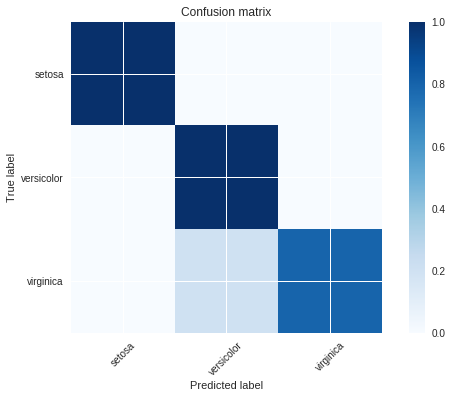

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(set(test['species'])))
plt.xticks(tick_marks, set(preds), rotation=45)
plt.yticks(tick_marks, set(test['species']))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Visualización del árbol

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

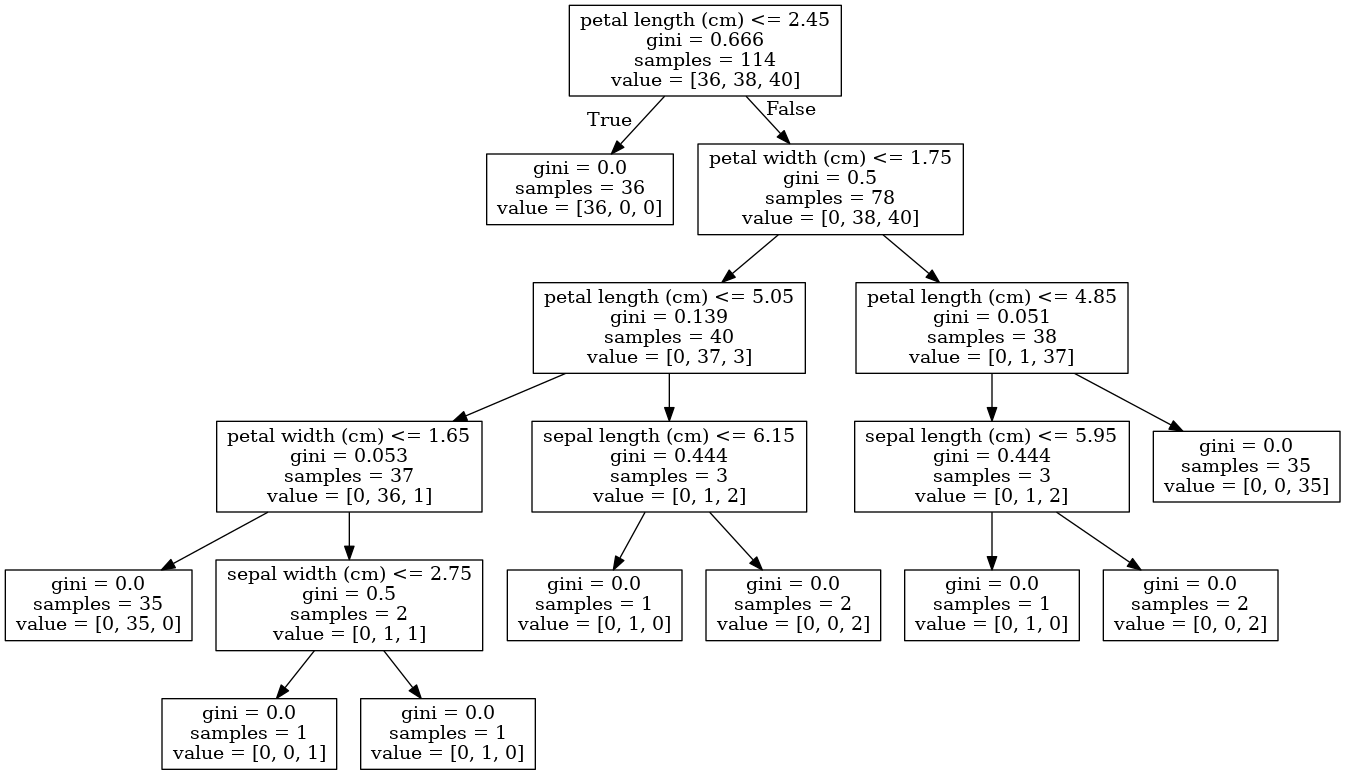

In [0]:
from IPython.display import Image
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) 